In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import seaborn as sns

In [118]:
df = pd.read_parquet('Train.parquet')
df1 = pd.read_parquet('Test.parquet')


In [119]:
# using dummies to encode the data
df = pd.get_dummies(df, columns=['Incident'])

In [120]:
# remove duplicates
df = df.drop_duplicates()
df1 = df1.drop_duplicates()


In [121]:
df.head(5)

Patient-Uid       Date  Incident_DRUG_TYPE_0  \
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09                     0   
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16                     0   
3  a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30                     0   
4  a0dc950b-1c7c-11ec-b6ec-16262ee38c7f 2015-04-22                     1   
8  a0dc9543-1c7c-11ec-bb63-16262ee38c7f 2016-06-18                     0   

   Incident_DRUG_TYPE_1  Incident_DRUG_TYPE_10  Incident_DRUG_TYPE_11  \
0                     0                      0                      0   
1                     0                      0                      0   
3                     0                      0                      0   
4                     0                      0                      0   
8                     1                      0                      0   

   Incident_DRUG_TYPE_12  Incident_DRUG_TYPE_13  Incident_DRUG_TYPE_14  \
0                      0                      0                      0   
1                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   
8                      0                      0                      0   

   Incident_DRUG_TYPE_15  ...  Incident_SYMPTOM_TYPE_7  \
0                      0  ...                        0   
1                      0  ...                        0   
3                      0  ...                        0   
4                      0  ...                        0   
8                      0  ...                        0   

   Incident_SYMPTOM_TYPE_8  Incident_SYMPTOM_TYPE_9  Incident_TARGET DRUG  \
0                        0                        0                     0   
1                        0                        0                     0   
3                        0                        0                     0   
4                        0                        0                     0   
8                        0                        0                     0   

   Incident_TEST_TYPE_0  Incident_TEST_TYPE_1  Incident_TEST_TYPE_2  \
0                     0                     0                     0   
1                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   
8                     0                     0                     0   

   Incident_TEST_TYPE_3  Incident_TEST_TYPE_4  Incident_TEST_TYPE_5  
0                     0                     0                     0  
1                     0                     0                     0  
3                     0                     0                     0  
4                     0                     0                     0  
8                     0                     0                     0  

[5 rows x 59 columns]

In [122]:
df1.head(5)

Patient-Uid       Date        Incident
0  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08  SYMPTOM_TYPE_0
1  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2018-10-17     DRUG_TYPE_0
2  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2017-12-01     DRUG_TYPE_2
3  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2018-12-05     DRUG_TYPE_1
4  a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2017-11-04  SYMPTOM_TYPE_0

In [123]:
df.shape,df1.shape

((3185297, 59), (1053424, 3))

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3185297 entries, 0 to 29080911
Data columns (total 59 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Patient-Uid                 object        
 1   Date                        datetime64[ns]
 2   Incident_DRUG_TYPE_0        uint8         
 3   Incident_DRUG_TYPE_1        uint8         
 4   Incident_DRUG_TYPE_10       uint8         
 5   Incident_DRUG_TYPE_11       uint8         
 6   Incident_DRUG_TYPE_12       uint8         
 7   Incident_DRUG_TYPE_13       uint8         
 8   Incident_DRUG_TYPE_14       uint8         
 9   Incident_DRUG_TYPE_15       uint8         
 10  Incident_DRUG_TYPE_16       uint8         
 11  Incident_DRUG_TYPE_17       uint8         
 12  Incident_DRUG_TYPE_18       uint8         
 13  Incident_DRUG_TYPE_2        uint8         
 14  Incident_DRUG_TYPE_3        uint8         
 15  Incident_DRUG_TYPE_4        uint8         
 16  Incident_DRUG_TYP

In [125]:
df.groupby('Patient-Uid').max()

Date  Incident_DRUG_TYPE_0  \
Patient-Uid                                                             
a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2020-08-09                     1   
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2020-03-29                     1   
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2019-04-05                     1   
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f 2020-07-10                     1   
a0dc9543-1c7c-11ec-bb63-16262ee38c7f 2020-08-12                     1   
...                                         ...                   ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f 2020-08-30                     1   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f 2020-08-10                     1   
a0f0d523-1c7c-11ec-89d2-16262ee38c7f 2020-08-11                     1   
a0f0d553-1c7c-11ec-a70a-16262ee38c7f 2020-07-21                     1   
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-08                     1   

                                      Incident_DRUG_TYPE_1  \
Patient-Uid                                                  
a0db1e73-1c7c-11ec-ae39-16262ee38c7f                     0   
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f                     1   
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f                     1   
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f                     1   
a0dc9543-1c7c-11ec-bb63-16262ee38c7f                     1   
...                                                    ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f                     1   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f                     1   
a0f0d523-1c7c-11ec-89d2-16262ee38c7f                     1   
a0f0d553-1c7c-11ec-a70a-16262ee38c7f                     1   
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f                     1   

                                      Incident_DRUG_TYPE_10  \
Patient-Uid                                                   
a0db1e73-1c7c-11ec-ae39-16262ee38c7f                      0   
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f                      0   
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f                      0   
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f                      0   
a0dc9543-1c7c-11ec-bb63-16262ee38c7f                      0   
...                                                     ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f                      0   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f                      0   
a0f0d523-1c7c-11ec-89d2-16262ee38c7f                      0   
a0f0d553-1c7c-11ec-a70a-16262ee38c7f                      0   
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f                      1   

                                      Incident_DRUG_TYPE_11  \
Patient-Uid                                                   
a0db1e73-1c7c-11ec-ae39-16262ee38c7f                      1   
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f                      0   
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f                      1   
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f                      0   
a0dc9543-1c7c-11ec-bb63-16262ee38c7f                      1   
...                                                     ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f                      0   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f                      0   
a0f0d523-1c7c-11ec-89d2-16262ee38c7f                      1   
a0f0d553-1c7c-11ec-a70a-16262ee38c7f                      0   
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f                      0   

                                      Incident_DRUG_TYPE_12  \
Patient-Uid                                                   
a0db1e73-1c7c-11ec-ae39-16262ee38c7f                      0   
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f                      0   
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f                      0   
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f                      0   
a0dc9543-1c7c-11ec-bb63-16262ee38c7f                      0   
...                                                     ...   
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f                      0   
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f                      0   
a0f0d523-1c7c-11

In [126]:
df.sort_values(by = ['Date'], inplace=True)

In [127]:
df

Patient-Uid       Date  \
2222167   a0e2d262-1c7c-11ec-93d9-16262ee38c7f 2015-04-07   
2931211   a0e7e340-1c7c-11ec-97ca-16262ee38c7f 2015-04-07   
2609406   a0e2bb12-1c7c-11ec-bc94-16262ee38c7f 2015-04-07   
2609409   a0e1fd77-1c7c-11ec-a1d2-16262ee38c7f 2015-04-07   
2765911   a0e1fa82-1c7c-11ec-b072-16262ee38c7f 2015-04-07   
...                                        ...        ...   
23132677  a0eb2a57-1c7c-11ec-b755-16262ee38c7f 2020-09-03   
3934130   a0ebbc15-1c7c-11ec-b4be-16262ee38c7f 2020-09-03   
21170875  a0f048fb-1c7c-11ec-82c9-16262ee38c7f 2020-09-03   
2450641   a0e65375-1c7c-11ec-93c4-16262ee38c7f 2020-09-03   
26691229  a0ebf96a-1c7c-11ec-b2cb-16262ee38c7f 2020-09-03   

          Incident_DRUG_TYPE_0  Incident_DRUG_TYPE_1  Incident_DRUG_TYPE_10  \
2222167                      0                     1                      0   
2931211                      0                     0                      0   
2609406                      0                     0                      0   
2609409                      0                     0                      0   
2765911                      0                     0                      0   
...                        ...                   ...                    ...   
23132677                     1                     0                      0   
3934130                      0                     0                      0   
21170875                     0                     0                      0   
2450641                      0                     0                      0   
26691229                     0                     1                      0   

          Incident_DRUG_TYPE_11  Incident_DRUG_TYPE_12  Incident_DRUG_TYPE_13  \
2222167                       0                      0                      0   
2931211                       0                      0                      0   
2609406                       0                      0                      0   
2609409                       1                      0                      0   
2765911                       0                      0                      0   
...                         ...                    ...                    ...   
23132677                      0                      0                      0   
3934130                       0                      0                      0   
21170875                      0                      0                      0   
2450641                       0                      0                      1   
26691229                      0                      0                      0   

          Incident_DRUG_TYPE_14  Incident_DRUG_TYPE_15  ...  \
2222167                       0                      0  ...   
2931211                       0                      0  ...   
2609406                       0                      0  ...   
2609409                       0                      0  ...   
2765911                       0                      0  ...   
...                         ...                    ...  ...   
23132677                      0                      0  ...   
3934130                       0                      0  ...   
21170875                      0                      0  ...   
2450641                       0                      0  ...   
26691229                      0                      0  ...   

          Incident_SYMPTOM_TYPE_7  Incident_SYMPTOM_TYPE_8  \
2222167                         0                        0   
2931211                         0                        0   
2609406                         0                        0   
2609409                         0                        0   
2765911                         0                        0   
...                           ...                      ...   
23132677                        0                        0   
3934130                         0                        0   
21170875                        0                        0   
245

In [128]:
# convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# filter data between two dates
filtered_df = df.loc[(df['Date'] >= '2020-09-01') & (df['Date'] < '2020-09-30')]

In [129]:
filtered_df

Patient-Uid       Date  \
22136434  a0ea1c89-1c7c-11ec-aa53-16262ee38c7f 2020-09-01   
11752125  a0ed8527-1c7c-11ec-97ec-16262ee38c7f 2020-09-01   
688186    a0e1c097-1c7c-11ec-85f6-16262ee38c7f 2020-09-01   
2491      a0dd3d4b-1c7c-11ec-93d9-16262ee38c7f 2020-09-01   
809190    a0df610e-1c7c-11ec-a537-16262ee38c7f 2020-09-01   
...                                        ...        ...   
23132677  a0eb2a57-1c7c-11ec-b755-16262ee38c7f 2020-09-03   
3934130   a0ebbc15-1c7c-11ec-b4be-16262ee38c7f 2020-09-03   
21170875  a0f048fb-1c7c-11ec-82c9-16262ee38c7f 2020-09-03   
2450641   a0e65375-1c7c-11ec-93c4-16262ee38c7f 2020-09-03   
26691229  a0ebf96a-1c7c-11ec-b2cb-16262ee38c7f 2020-09-03   

          Incident_DRUG_TYPE_0  Incident_DRUG_TYPE_1  Incident_DRUG_TYPE_10  \
22136434                     1                     0                      0   
11752125                     0                     1                      0   
688186                       0                     0                      0   
2491                         1                     0                      0   
809190                       0                     0                      0   
...                        ...                   ...                    ...   
23132677                     1                     0                      0   
3934130                      0                     0                      0   
21170875                     0                     0                      0   
2450641                      0                     0                      0   
26691229                     0                     1                      0   

          Incident_DRUG_TYPE_11  Incident_DRUG_TYPE_12  Incident_DRUG_TYPE_13  \
22136434                      0                      0                      0   
11752125                      0                      0                      0   
688186                        0                      0                      0   
2491                          0                      0                      0   
809190                        0                      0                      0   
...                         ...                    ...                    ...   
23132677                      0                      0                      0   
3934130                       0                      0                      0   
21170875                      0                      0                      0   
2450641                       0                      0                      1   
26691229                      0                      0                      0   

          Incident_DRUG_TYPE_14  Incident_DRUG_TYPE_15  ...  \
22136434                      0                      0  ...   
11752125                      0                      0  ...   
688186                        0                      0  ...   
2491                          0                      0  ...   
809190                        0                      0  ...   
...                         ...                    ...  ...   
23132677                      0                      0  ...   
3934130                       0                      0  ...   
21170875                      0                      0  ...   
2450641                       0                      0  ...   
26691229                      0                      0  ...   

          Incident_SYMPTOM_TYPE_7  Incident_SYMPTOM_TYPE_8  \
22136434                        0                        0   
11752125                        0                        0   
688186                          0                        0   
2491                            0                        0   
809190                          0                        0   
...                           ...                      ...   
23132677                        0                        0   
3934130                         0                        0   
21170875                        0                        0   
245

In [130]:
train_df=filtered_df.copy()

In [131]:
a = []
for i in train_df.keys():
  a.append(i)
print(a)

['Patient-Uid', 'Date', 'Incident_DRUG_TYPE_0', 'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10', 'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12', 'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14', 'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16', 'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_18', 'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3', 'Incident_DRUG_TYPE_4', 'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6', 'Incident_DRUG_TYPE_7', 'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9', 'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0', 'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10', 'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12', 'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14', 'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16', 'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYPE_18', 'Incident_SYMPTOM_TYPE_19', 'Incident_SYMPTOM_TYPE_2', 'Incident_SYMPTOM_TYPE_20', 'Incident_SYMPTOM_TYPE_21', 'Incident_SYMPTOM_TYPE_22', 'Incident_SYMPTOM_TYPE_23', 'Inciden

In [132]:
a.remove('Patient-Uid')
a.remove('Date')
print(a)

['Incident_DRUG_TYPE_0', 'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10', 'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12', 'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14', 'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16', 'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_18', 'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3', 'Incident_DRUG_TYPE_4', 'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6', 'Incident_DRUG_TYPE_7', 'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9', 'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0', 'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10', 'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12', 'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14', 'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16', 'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYPE_18', 'Incident_SYMPTOM_TYPE_19', 'Incident_SYMPTOM_TYPE_2', 'Incident_SYMPTOM_TYPE_20', 'Incident_SYMPTOM_TYPE_21', 'Incident_SYMPTOM_TYPE_22', 'Incident_SYMPTOM_TYPE_23', 'Incident_SYMPTOM_TYPE_24', 'In

In [138]:
cols_to_check = [
    'Incident_DRUG_TYPE_0', 'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10',
    'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12', 'Incident_DRUG_TYPE_13',
    'Incident_DRUG_TYPE_14', 'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16',
    'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_18', 'Incident_DRUG_TYPE_2',
    'Incident_DRUG_TYPE_3', 'Incident_DRUG_TYPE_4', 'Incident_DRUG_TYPE_5',
    'Incident_DRUG_TYPE_6', 'Incident_DRUG_TYPE_7', 'Incident_DRUG_TYPE_8',
    'Incident_DRUG_TYPE_9', 'Incident_PRIMARY_DIAGNOSIS',
    'Incident_SYMPTOM_TYPE_0', 'Incident_SYMPTOM_TYPE_1',
    'Incident_SYMPTOM_TYPE_10', 'Incident_SYMPTOM_TYPE_11',
    'Incident_SYMPTOM_TYPE_12', 'Incident_SYMPTOM_TYPE_13',
    'Incident_SYMPTOM_TYPE_14', 'Incident_SYMPTOM_TYPE_15',
    'Incident_SYMPTOM_TYPE_16', 'Incident_SYMPTOM_TYPE_17',
    'Incident_SYMPTOM_TYPE_18', 'Incident_SYMPTOM_TYPE_19',
    'Incident_SYMPTOM_TYPE_2', 'Incident_SYMPTOM_TYPE_20',
    'Incident_SYMPTOM_TYPE_21', 'Incident_SYMPTOM_TYPE_22',
    'Incident_SYMPTOM_TYPE_23', 'Incident_SYMPTOM_TYPE_24',
    'Incident_SYMPTOM_TYPE_25', 'Incident_SYMPTOM_TYPE_26',
    'Incident_SYMPTOM_TYPE_27', 'Incident_SYMPTOM_TYPE_28',
    'Incident_SYMPTOM_TYPE_29', 'Incident_SYMPTOM_TYPE_3',
    'Incident_SYMPTOM_TYPE_4', 'Incident_SYMPTOM_TYPE_5',
    'Incident_SYMPTOM_TYPE_6', 'Incident_SYMPTOM_TYPE_7',
    'Incident_SYMPTOM_TYPE_8', 'Incident_SYMPTOM_TYPE_9',
    'Incident_TARGET DRUG', 'Incident_TEST_TYPE_0', 'Incident_TEST_TYPE_1',
    'Incident_TEST_TYPE_2', 'Incident_TEST_TYPE_3', 'Incident_TEST_TYPE_4',
    'Incident_TEST_TYPE_5'
]
train_df['TARGET_DRUG'] = np.where(train_df[cols_to_check]== 0, 1, 0)

In [139]:
# Viewing the Values of Traget Variable.
train_df['TARGET_DRUG'].value_counts()

1    5245
0     760
Name: TARGET_DRUG, dtype: int64

In [141]:
positive = train_df[train_df['TARGET_DRUG'] == 1]
negative = train_df[train_df['TARGET_DRUG'] == 0]
     

In [142]:
print('Average Target Drug: ' + str(train_df['TARGET_DRUG'].mean()))
print('Average Taken Target Drug: ' + str(positive['TARGET_DRUG'].mean()))
print('Average Not taking drug: ' + str(negative['TARGET_DRUG'].mean()))
print('\n')

Average Target Drug: 0.8734388009991674
Average Taken Target Drug: 1.0
Average Not taking drug: 0.0




In [143]:
# create a list of our conditions
conditions = [
    (train_df['TARGET_DRUG'] == 1),
    (train_df['TARGET_DRUG'] != 1)]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
train_df['label'] = np.select(conditions, values)

# display updated DataFrame
train_df
     

Patient-Uid       Date  \
22136434  a0ea1c89-1c7c-11ec-aa53-16262ee38c7f 2020-09-01   
11752125  a0ed8527-1c7c-11ec-97ec-16262ee38c7f 2020-09-01   
688186    a0e1c097-1c7c-11ec-85f6-16262ee38c7f 2020-09-01   
2491      a0dd3d4b-1c7c-11ec-93d9-16262ee38c7f 2020-09-01   
809190    a0df610e-1c7c-11ec-a537-16262ee38c7f 2020-09-01   
...                                        ...        ...   
23132677  a0eb2a57-1c7c-11ec-b755-16262ee38c7f 2020-09-03   
3934130   a0ebbc15-1c7c-11ec-b4be-16262ee38c7f 2020-09-03   
21170875  a0f048fb-1c7c-11ec-82c9-16262ee38c7f 2020-09-03   
2450641   a0e65375-1c7c-11ec-93c4-16262ee38c7f 2020-09-03   
26691229  a0ebf96a-1c7c-11ec-b2cb-16262ee38c7f 2020-09-03   

          Incident_DRUG_TYPE_0  Incident_DRUG_TYPE_1  Incident_DRUG_TYPE_10  \
22136434                     1                     0                      0   
11752125                     0                     1                      0   
688186                       0                     0                      0   
2491                         1                     0                      0   
809190                       0                     0                      0   
...                        ...                   ...                    ...   
23132677                     1                     0                      0   
3934130                      0                     0                      0   
21170875                     0                     0                      0   
2450641                      0                     0                      0   
26691229                     0                     1                      0   

          Incident_DRUG_TYPE_11  Incident_DRUG_TYPE_12  Incident_DRUG_TYPE_13  \
22136434                      0                      0                      0   
11752125                      0                      0                      0   
688186                        0                      0                      0   
2491                          0                      0                      0   
809190                        0                      0                      0   
...                         ...                    ...                    ...   
23132677                      0                      0                      0   
3934130                       0                      0                      0   
21170875                      0                      0                      0   
2450641                       0                      0                      1   
26691229                      0                      0                      0   

          Incident_DRUG_TYPE_14  Incident_DRUG_TYPE_15  ...  \
22136434                      0                      0  ...   
11752125                      0                      0  ...   
688186                        0                      0  ...   
2491                          0                      0  ...   
809190                        0                      0  ...   
...                         ...                    ...  ...   
23132677                      0                      0  ...   
3934130                       0                      0  ...   
21170875                      0                      0  ...   
2450641                       0                      0  ...   
26691229                      0                      0  ...   

          Incident_SYMPTOM_TYPE_9  Incident_TARGET DRUG  Incident_TEST_TYPE_0  \
22136434                        0                     0                     0   
11752125                        0                     0                     0   
688186                          0                     0                     0   
2491                            0                     0                     0   
809190                          0                     0                     0   
...                           ...                   ...                   ...   
23132677                        0                     0 

In [145]:
df_1 = train_df.drop(['Date','TARGET_DRUG'], axis=1)

In [146]:
df_1.shape

(6005, 59)

In [147]:
train_df1 = df_1.copy()
     

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


from sklearn.metrics import f1_score


In [148]:
X = train_df1.drop('Patient-Uid', axis=1)
y = train_df1['label']

In [149]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [150]:
logistic_regression = LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred = logistic_regression.predict(X_test)


In [154]:
logistic_regression.coef_

array([[-5.43500310e+00,  6.77299510e-01,  2.52615031e-01,
         1.09106638e-01,  1.44780639e-02,  3.24997469e-02,
         3.83670072e-02,  2.65637495e-02,  4.17956815e-03,
         6.25629700e-03,  0.00000000e+00,  4.01683756e-01,
         3.07144033e-01,  2.09416337e-03,  1.53024082e-01,
         7.70561739e-01,  4.19458306e-01,  2.74314089e-01,
         1.48319415e-01,  7.35003661e-01,  1.00557827e-01,
         2.45694913e-02,  8.32443134e-03,  8.32443134e-03,
         1.03840514e-02,  6.25629700e-03,  3.05288083e-02,
         1.03840514e-02,  8.32443134e-03,  2.09416337e-03,
         2.09416337e-03,  0.00000000e+00,  2.05571651e-02,
         0.00000000e+00,  0.00000000e+00,  2.09416337e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.05571651e-02,  2.09416337e-03,  1.85389531e-02,
         1.44780639e-02,  5.74503622e-02,  4.22412059e-02,
         8.32443134e-03,  1.24352363e-02,  4.20430164e-0

In [155]:
logistic_regression.intercept_

array([0.72997306])

In [156]:
logistic_regression.score(X_test,y_test)


1.0

In [159]:
confusion_matrix(y_test,y_pred)

array([[ 154,    0],
       [   0, 1047]], dtype=int64)

In [160]:
f1_score(y_test,y_pred)

1.0

In [161]:
accuracy_score(y_test, y_pred)

1.0

<Axes: xlabel='Predicted', ylabel='Actual'>

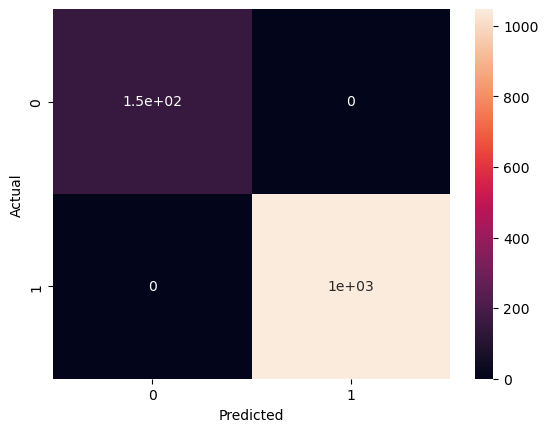

In [164]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [165]:
# Remove all columns between column name 'B' to 'D'
df_1 = df_1.drop(df_1.loc[:, 'Incident_DRUG_TYPE_0':'Incident_TEST_TYPE_5'].columns, axis=1)
     

In [166]:
df_1

Patient-Uid  label
22136434  a0ea1c89-1c7c-11ec-aa53-16262ee38c7f      0
11752125  a0ed8527-1c7c-11ec-97ec-16262ee38c7f      1
688186    a0e1c097-1c7c-11ec-85f6-16262ee38c7f      1
2491      a0dd3d4b-1c7c-11ec-93d9-16262ee38c7f      0
809190    a0df610e-1c7c-11ec-a537-16262ee38c7f      1
...                                        ...    ...
23132677  a0eb2a57-1c7c-11ec-b755-16262ee38c7f      0
3934130   a0ebbc15-1c7c-11ec-b4be-16262ee38c7f      1
21170875  a0f048fb-1c7c-11ec-82c9-16262ee38c7f      1
2450641   a0e65375-1c7c-11ec-93c4-16262ee38c7f      1
26691229  a0ebf96a-1c7c-11ec-b2cb-16262ee38c7f      1

[6005 rows x 2 columns]

In [167]:
import os

path = r'C:\Users\HP\Downloads\Structured_Data_Assignment_\final_submission.csv'

df_1.to_csv(path, index=False)


In [168]:
df_1

Patient-Uid  label
22136434  a0ea1c89-1c7c-11ec-aa53-16262ee38c7f      0
11752125  a0ed8527-1c7c-11ec-97ec-16262ee38c7f      1
688186    a0e1c097-1c7c-11ec-85f6-16262ee38c7f      1
2491      a0dd3d4b-1c7c-11ec-93d9-16262ee38c7f      0
809190    a0df610e-1c7c-11ec-a537-16262ee38c7f      1
...                                        ...    ...
23132677  a0eb2a57-1c7c-11ec-b755-16262ee38c7f      0
3934130   a0ebbc15-1c7c-11ec-b4be-16262ee38c7f      1
21170875  a0f048fb-1c7c-11ec-82c9-16262ee38c7f      1
2450641   a0e65375-1c7c-11ec-93c4-16262ee38c7f      1
26691229  a0ebf96a-1c7c-11ec-b2cb-16262ee38c7f      1

[6005 rows x 2 columns]